<a href="https://colab.research.google.com/github/jingxuchen19/ECON5200-Applied-Data-Analytics-in-Economics/blob/main/Assignment_1/Econ_5200_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Phase 1: Prepare (Logic & Contol Flow)

In [25]:
# Manual Data Construction
student_basket = [
    {'Item': 'Tuition', 'Price_2016': 45000, 'Price_2024': 58000},
    {'Item': 'Rent (1 Bed)', 'Price_2016': 1200, 'Price_2024': 1800},
    {'Item': 'Chipotle Burrito', 'Price_2016': 7.50, 'Price_2024': 11.50},
    {'Item': 'Spotify', 'Price_2016': 9.99, 'Price_2024': 11.99},
]

In [26]:
# Define the "Machine" (Function)
def calculate_inflation(base, current):
  return ((current - base) / base) * 100

# Run the Loop
for item in student_basket:
  rate = calculate_inflation(item['Price_2016'], item['Price_2024'])
  print(f"{item['Item']}: {rate: .2f}% Inflation")

Tuition:  28.89% Inflation
Rent (1 Bed):  50.00% Inflation
Chipotle Burrito:  53.33% Inflation
Spotify:  20.02% Inflation


Phase 2: Process (The API Pipeline)

Step 2.1: The "Data Proxy" Strategy

In [27]:
!pip install fredapi
from fredapi import Fred
fred = Fred(api_key='ca5188a28784f41d2babf47d068e380b')

# Fetch Series
official_cpi = fred.get_series('CPIAUCSL')
tuition = fred.get_series('CUSR0000SEEB')
rent = fred.get_series('CUSR0000SEHA')
streaming = fred.get_series('CUSR0000SERA02')
food_away = fred.get_series('CUSR0000SEFV')

Step 2.2: Normalization Logic

In [28]:
import pandas as pd

df = pd.DataFrame({
    'Official CPI': official_cpi,
    'Tuition': tuition,
    'Rent': rent,
    'Streaming': streaming,
    'Food Away': food_away
})

df = df.dropna()
df.index = pd.to_datetime(df.index)

start_date = "2016-01-01"

base_values = df.loc[start_date]

df_norm = (df / base_values) * 100

print(df_norm.head())
print(df_norm.tail())

            Official CPI    Tuition       Rent  Streaming  Food Away
1992-01-01     58.194335  28.671551  49.845732  42.288639  53.777918
1992-02-01     58.320570  28.842981  49.948577  42.522536  53.854853
1992-03-01     58.530961  29.071553  50.222832  42.873382  53.893321
1992-04-01     58.657196  29.285840  50.119986  43.551684  53.931789
1992-05-01     58.783431  29.471555  50.222832  43.317787  54.008724
            Official CPI     Tuition        Rent   Streaming   Food Away
2025-07-01    135.547776  127.653119  149.520740  139.048225  147.642311
2025-08-01    136.066181  127.901262  149.969832  138.608498  148.065841
2025-09-01    136.488647  128.186549  150.264655  138.918178  148.274337
2025-11-01    136.767627  128.857838  150.454234  140.157366  148.947907
2025-12-01    137.187989  129.057982  150.851560  141.700855  149.981535


Phase 3: Analyze (The Index Theory & Visualization)

Step 3.1: Visualizing Raw Components

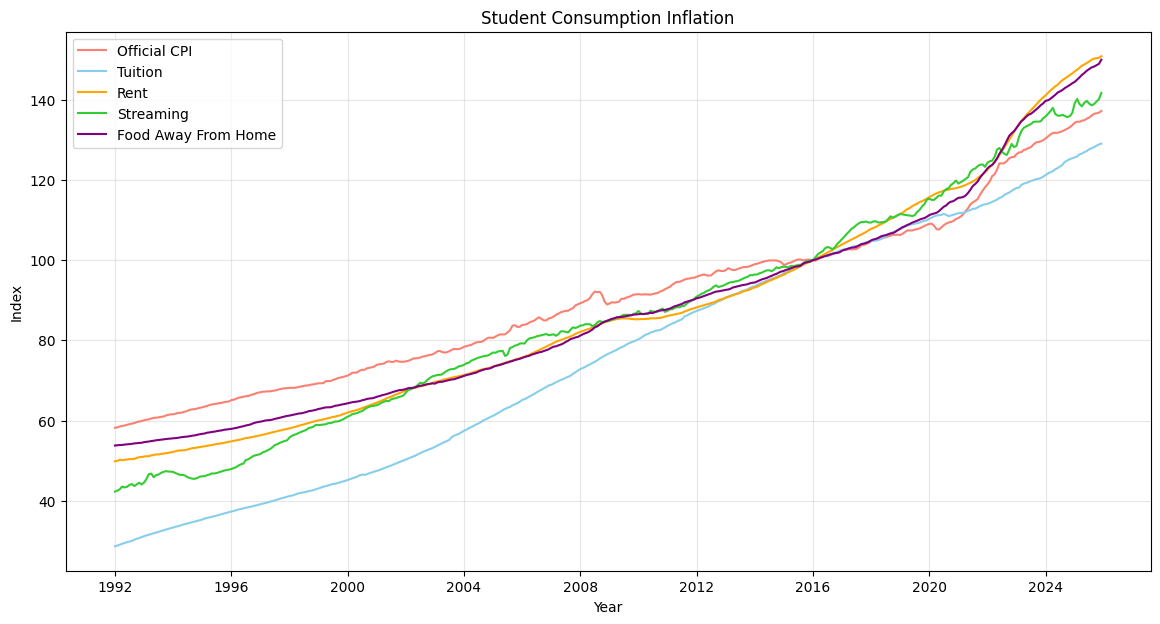

In [29]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14, 7))

plt.plot(df_norm.index, df_norm[('Official CPI')], label='Official CPI', color='salmon')
plt.plot(df_norm.index, df_norm[('Tuition')], label='Tuition', color='skyblue')
plt.plot(df_norm.index, df_norm[('Rent')], label='Rent', color='orange')
plt.plot(df_norm.index, df_norm[('Streaming')], label='Streaming', color='limegreen')
plt.plot(df_norm.index, df_norm[('Food Away')], label='Food Away From Home', color='purple')

plt.title('Student Consumption Inflation')
plt.ylabel('Index')
plt.xlabel('Year')

plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Step 3.2: The Weighted "Student SPI" (Honest Chart)

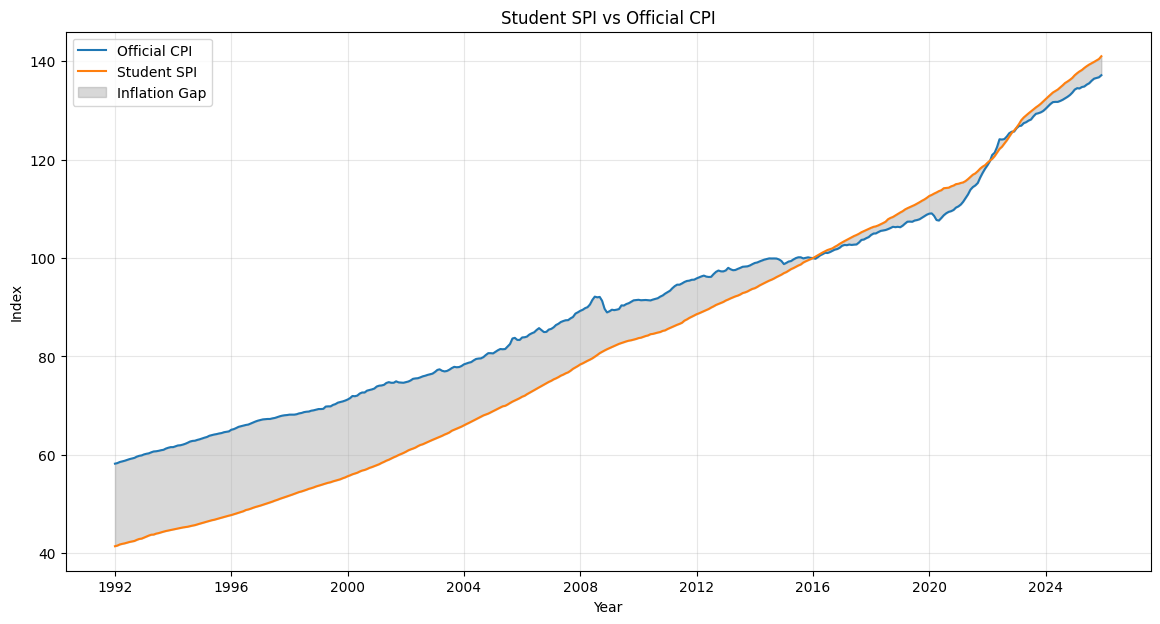

In [30]:
# Define a weight dictionary
weights = {
    'Tuition': 0.40,
    'Rent': 0.30,
    'Streaming': 0.10,
    'Food Away': 0.20
}

df_norm['Student_SPI'] = (
    df_norm['Tuition'] * weights['Tuition'] +
    df_norm['Rent'] * weights['Rent'] +
    df_norm['Streaming'] * weights['Streaming'] +
    df_norm['Food Away'] * weights['Food Away']
)

plt.figure(figsize=(14,7))

plt.plot(df_norm.index, df_norm['Official CPI'], label='Official CPI')
plt.plot(df_norm.index, df_norm['Student_SPI'], label='Student SPI')

plt.fill_between(df_norm.index, df_norm['Student_SPI'], df_norm['Official CPI'], color='gray', alpha=0.3, label='Inflation Gap')

plt.title('Student SPI vs Official CPI')
plt.ylabel('Index')
plt.xlabel('Year')

plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Step 3.3: The Scale Fallacy (Why We Normalize)

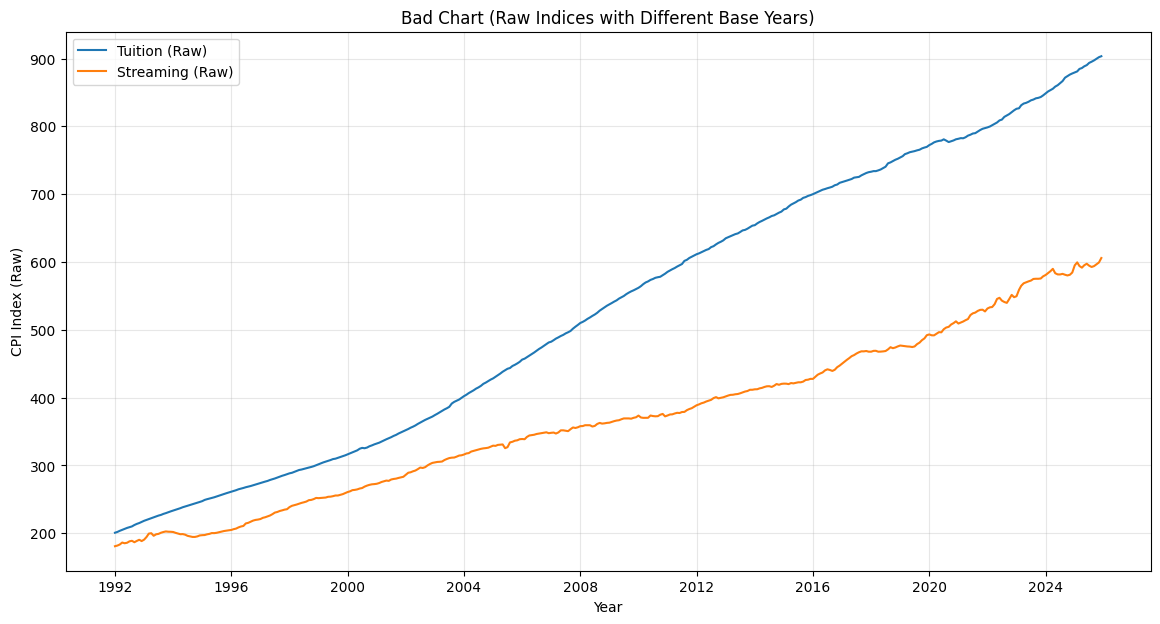

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,7))

plt.plot(df.index, df['Tuition'], label='Tuition (Raw)')
plt.plot(df.index, df['Streaming'], label='Streaming (Raw)')

plt.title('Bad Chart (Raw Indices with Different Base Years)')
plt.ylabel('CPI Index (Raw)')
plt.xlabel('Year')

plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Step 3.3 Deliverable: Why Raw Index Comparison is a 'Data Crime':

Comparing raw CPI indices with different base years is misleading because the index levels are not on the same scale. The raw plot makes Tuition look "huge" and Streaming look "tiny", even though this difference is largely driven by different index baselines. Therefore, normalization to a common base year (2016=100) is required for meaningful comparisons.

Phase 4: AI Expansopm (The Co-Pilot Era)

Task 4.1: The Ultimate Reality Check

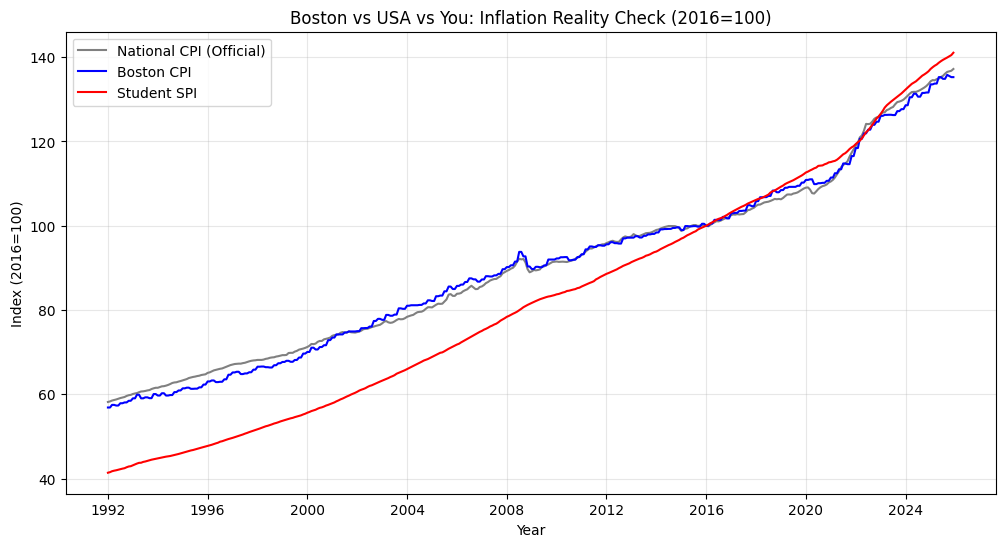

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Fetch Boston CPI from FRED
# FRED series: CUURA103SA0  (Boston-Cambridge-Newton CPI, All Items)
boston_raw = fred.get_series("CUURA103SA0")
boston = boston_raw.to_frame(name="Boston_CPI")
boston.index = pd.to_datetime(boston.index)

# 2) Normalize Boston CPI to 2016=100
base_date = "2016-01-01"
boston_base = boston.loc[base_date, "Boston_CPI"]
boston["Boston_CPI_Norm"] = (boston["Boston_CPI"] / boston_base) * 100

# 3) Merge with your existing normalized df
plot_df = df_norm[["Official CPI", "Student_SPI"]].copy()
plot_df = plot_df.join(boston["Boston_CPI_Norm"], how="left")

# Handle missing Boston values (some months may be missing)
plot_df["Boston_CPI_Norm"] = plot_df["Boston_CPI_Norm"].ffill()

# 4) Plot three lines
plt.figure(figsize=(12, 6))
plt.plot(plot_df.index, plot_df["Official CPI"], label="National CPI (Official)", color="gray")
plt.plot(plot_df.index, plot_df["Boston_CPI_Norm"], label="Boston CPI", color="blue")
plt.plot(plot_df.index, plot_df["Student_SPI"], label="Student SPI", color="red")

plt.title("Boston vs USA vs You: Inflation Reality Check (2016=100)")
plt.xlabel("Year")
plt.ylabel("Index (2016=100)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Task 4.2: The Digital Portfolio (AI-Written README)

Github Link: https://github.com/jingxuchen19/ECON5200-Applied-Data-Analytics-in-Economics/blob/main/Assignment_1/README.md